In [1]:
from evaluate import load_model_with_weights
from pipeline.load import MyDataset
from torchvision.transforms.functional import to_tensor
import torch
from matplotlib import pyplot as plt
import numpy as np
import torch.nn.functional as F
from sklearn.metrics import jaccard_score
import pdb

from matplotlib.widgets import Slider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import LovaszSoftmax.pytorch.lovasz_losses as L

In [76]:
device = torch.device('cpu')

In [65]:
def img_frombytes(data):
#     print(size)
    databytes = np.packbits(data, axis=1)
    return Image.frombytes(mode='1', size=(1024,1024), data=databytes)

def output_to_pred_imgs(output, dim=0):
    np_pred = torch.max(output, dim=dim)[1].cpu().numpy()
    return img_frombytes(np_pred)

def identity_trans(image, mask):
    return image, mask

def display_pred(model, dataset=None, index=None):
    if dataset is None:
        dataset = MyDataset(in_dir="training_data", custom_transforms=identity_trans)
        
    if index==None:
        index = np.random.randint(0, len(dataset))
    image_tuple=dataset[index]
    print(image_tuple[2])
    print(index)
    inputs = to_tensor(image_tuple[0]).unsqueeze(0).to(device)
    with torch.no_grad():
        prediction = model(inputs)
    
    if list(prediction[0].size())[1] == 1:
        print('1 class preds')
        fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
        ax[0][0].imshow(image_tuple[0])
        ax[0][1].imshow(image_tuple[1])
        
        out = (prediction[0]>0)
        IOU_incl_bg = L.iou_binary(out.cpu(), masks.cpu(), incl_bg=True)
        IOU_nobg = L.iou_binary(out.cpu(), masks.cpu(), incl_bg=False)
        ax[1][0].set_title(
            f'''Unscaled Thresh > 0,
            IOU_incl_bg={round(IOU_incl_bg)}, IOU_nobg={round(IOU_nobg)}'''
        )
        ax[1][0].imshow((prediction[0] > 0).cpu().squeeze())
        
        ax[1][1].set_title('Softmax of outputs.')
        ax[1][1].imshow(torch.softmax(prediction[0].squeeze(), dim=1).cpu().numpy())
        
        ax[2][0].set_title('Sigmoid of Output')
        sig = torch.sigmoid(prediction[0])
        ax[2][0].imshow(sig.squeeze().cpu())
        
        sig_mask = (sig > 0.5)
#         pdb.set_trace()
#         assert out == sig_mask
        
        
        IOU_incl_bg = L.iou_binary(sig_mask.cpu(), masks.cpu(), incl_bg=True)
        IOU_nobg = L.iou_binary(sig_mask.cpu(), masks.cpu(), incl_bg=False)
        ax[2][1].set_title(
            f'''Sigmoid Thresh>0.5,
            IOU_incl_bg={round(IOU_incl_bg)}, IOU_nobg={round(IOU_nobg)}'''
        )
        ax[2][1].imshow(sig_mask.squeeze().cpu())
        
    
    else:
        print('2 class preds')
        fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
        ax[0][0].imshow(image_tuple[0])
        ax[0][1].imshow(image_tuple[1])
        ax[1][0].imshow(prediction[0].cpu().squeeze()[0])
        ax[1][1].imshow(prediction[0].cpu().squeeze()[1])
        ax[1][2].imshow(prediction[0].argmax(dim=1).cpu().squeeze())
        ax[2][0].imshow(prediction[2].cpu().squeeze()[0])
        ax[2][1].imshow(prediction[2].cpu().squeeze()[1])
        ax[2][2].imshow(prediction[2].argmax(dim=1).cpu().squeeze())
        
# #     output = prediction[2]
#     np_pred = torch.max(output, dim=0)[1].cpu().numpy()

In [78]:
model.pretrained.layer1

Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, 

In [ ]:
model.pretrained.layer1

training_data
training_data/images/*.jpg
training_data/images/bc32f1_34816_36864_i.jpg
600
1 class preds


''

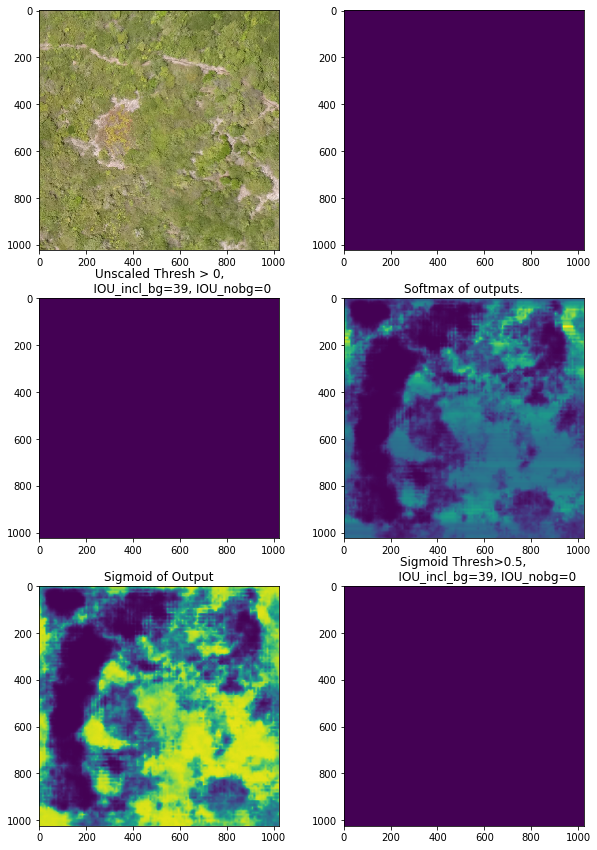

In [67]:
model = load_model_with_weights(model_name="11-03-2020_12-11__full_lovasz_trial_chkpt", use_lovasz=True)
dataset = MyDataset(in_dir="training_data")
model.to(device)
display_pred(model, dataset, index=600)
;

training_data/images/f883a0_56320_63488_i.jpg
5
1 class preds


''

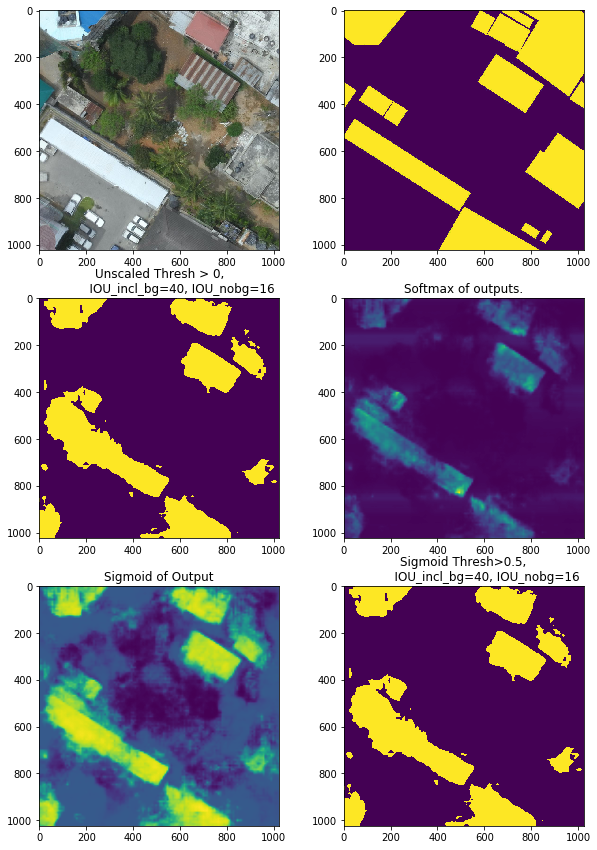

In [56]:
display_pred(model, dataset, index=5)
;

training_data/images/e52478_4096_0_i.jpg
1115
1 class preds


''

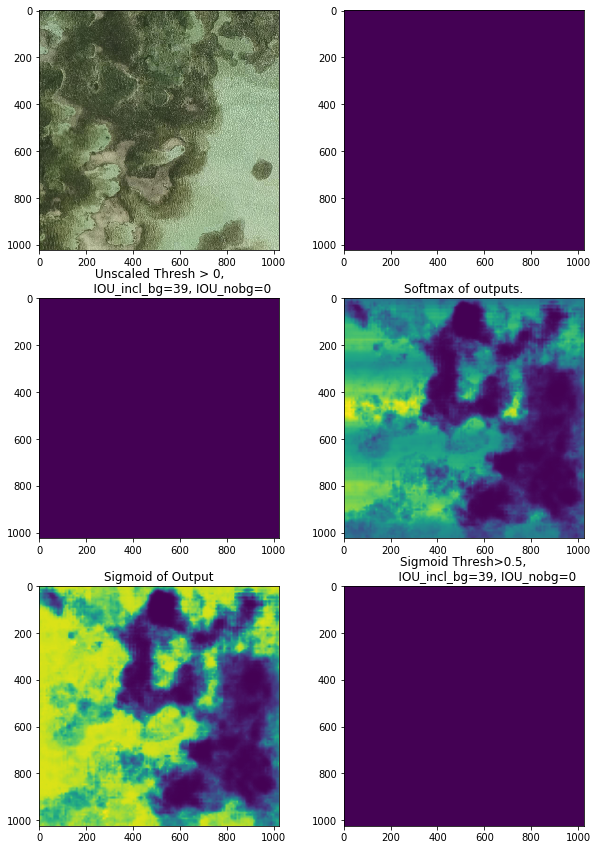

In [57]:
display_pred(model, dataset, index=1115)
;

training_data/images/a017f9_24576_45056_i.jpg
1125
1 class preds


''

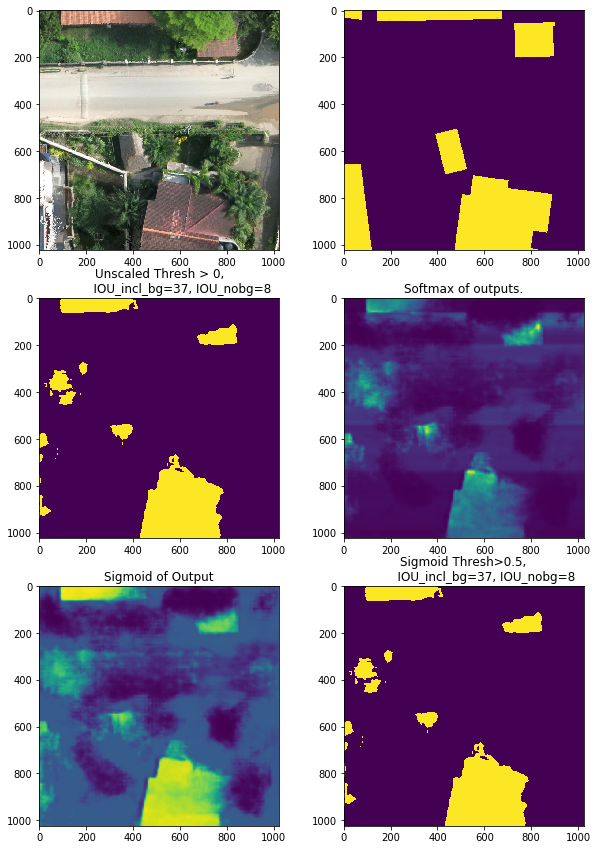

In [58]:
display_pred(model, dataset, index=1125)
;

training_data
training_data/images/*.jpg
training_data/images/665946_38912_81920_i.jpg
10000
1 class preds


''

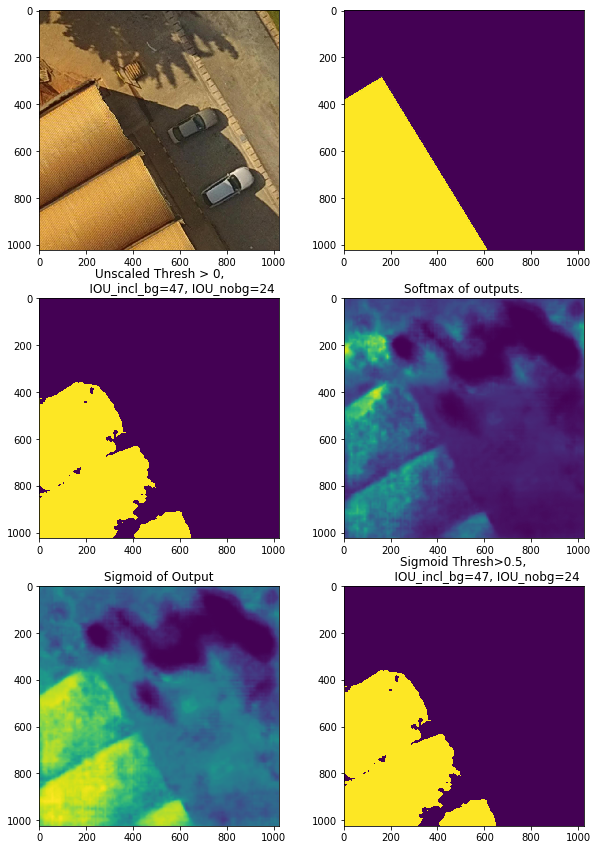

In [74]:
model = load_model_with_weights(model_name="12-03-2020_10-41__gradual_unfreeze_chkpt", use_lovasz=True)
dataset = MyDataset(in_dir="training_data")
model.to(device)
display_pred(model, dataset, index=10000)
;

training_data
training_data/images/*.jpg
training_data/images/665946_38912_81920_i.jpg
10000
1 class preds


''

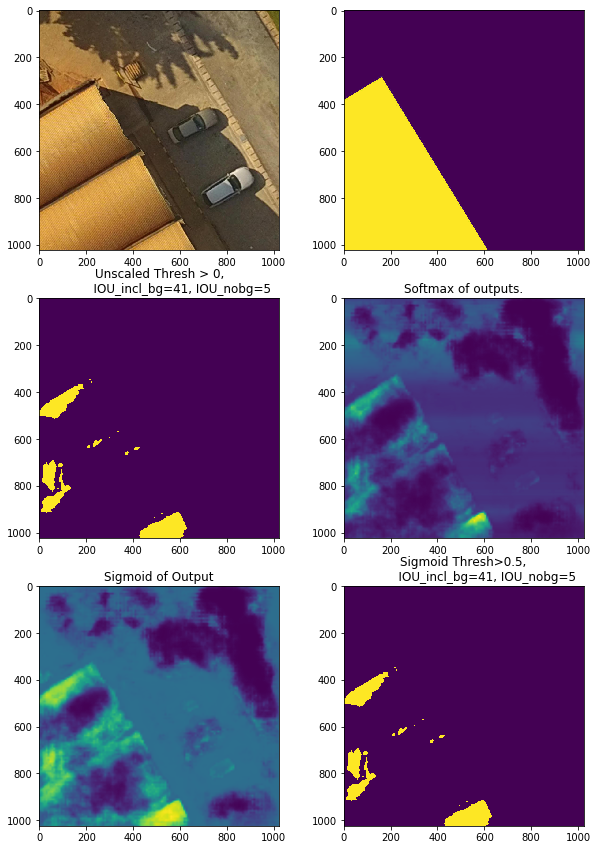

In [75]:
model = load_model_with_weights(model_name="11-03-2020_12-11__full_lovasz_trial_chkpt", use_lovasz=True)
dataset = MyDataset(in_dir="training_data")
model.to(device)
display_pred(model, dataset, index=10000)
;